## AMES-TOX KNN with feature selection

### the real test is 85% accuracy 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('../datasets/ames_datapreprocessing_knime.csv')
df.head()

,Unnamed: 0,AmesResult,Structure,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,0,C,[Na+].[Na+].CC1(C)SC2C(NC(=O)C(C([O-])=O)C3=CS...,-8.11340,85.0967,207.568628,129.67,428.399,428.008867,8,...,0,1,2,0,0,0,0,0,2,1
1,1,C,FC(F)(F)C1=CC(N\N=C2/C(=O)C(=CC3=CC=CC=C23)C(=...,11.17980,225.8008,365.430948,141.12,930.476,928.036083,10,...,0,0,0,7,0,0,0,0,4,2
2,2,C,CNC(=O)\C=C(/C)OP(=O)(OC)OC,1.05370,50.5332,82.840931,73.86,223.165,223.060959,6,...,0,0,0,0,0,0,0,0,0,0
3,3,C,CC(C)NC(=O)N1CC(=O)N(C1=O)C1=CC(Cl)=CC(Cl)=C1,2.88000,79.7177,131.140795,69.72,330.171,329.033397,6,...,0,0,1,1,0,0,0,0,0,0
4,4,C,C\C(CC\C=C(\C)C1CC(=O)C(C)(C)O1)=C/CC1=C(O)C(C...,5.22402,113.9341,176.578705,83.83,420.933,420.170352,5,...,0,0,1,1,0,0,0,0,0,0


In [4]:
df.shape

(12138, 122)

In [5]:
#df.isnull().sum()

In [6]:
df.AmesResult.unique()

array(['C', 'A', 'B', nan], dtype=object)

In [7]:
df_original = df
df = df_original.dropna()
print(df_original.shape[0] - df.shape[0])
df.isna().sum()
df_original.isna().sum()

6


Unnamed: 0    0
AmesResult    6
Structure     0
SlogP         0
SMR           0
             ..
MQN38         0
MQN39         0
MQN40         0
MQN41         0
MQN42         0
Length: 122, dtype: int64

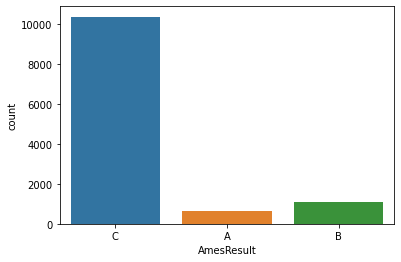

In [8]:
sns.countplot('AmesResult', data=df)

In [9]:
X = df.iloc[0: , 3:]
y = df.AmesResult

### Feature selection

#### Removing features with low variance & Z score normalization

In [91]:
X.var().sort_values(ascending=False)

AMW           42785.705062
ExactMW       42688.004538
LabuteASA      7769.304387
TPSA           5060.115434
SMR            2571.265016
                  ...     
MQN38             0.004530
MQN39             0.000082
smr_VSA8          0.000000
slogp_VSA9        0.000000
MQN18             0.000000
Length: 119, dtype: float64

In [92]:
treshold = 5
sel = VarianceThreshold(threshold=treshold).fit(X)

In [93]:
mask = sel.get_support() 

In [10]:
retained_columns = X.columns[mask]    
print(retained_columns.shape)

NameError: name 'mask' is not defined

In [16]:
thresholds = [1,5,20, 50] 

for t in thresholds:
    sel = VarianceThreshold(threshold=t).fit(X)
    mask = sel.get_support() 
    retained_columns = X.columns[mask]    
    
#     print(f'cols = {retained_columns.shape[0]}')

    print('~' * 50 )
    print(f'Columns for t = {t}')
    print(retained_columns)
    print('~' * 50 )
    
    

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Columns for t = 1
Index(['SlogP', 'SMR', 'LabuteASA', 'TPSA', 'AMW', 'ExactMW', 'NumLipinskiHBA',
       'NumLipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA',
       'NumHeteroAtoms', 'NumHeavyAtoms', 'NumAtoms', 'NumStereocenters',
       'NumRings', 'NumAromaticRings', 'NumAromaticCarbocycles', 'Chi0v',
       'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n',
       'HallKierAlpha', 'kappa1', 'kappa2', 'kappa3', 'slogp_VSA1',
       'slogp_VSA2', 'slogp_VSA3', 'slogp_VSA4', 'slogp_VSA5', 'slogp_VSA6',
       'slogp_VSA7', 'slogp_VSA8', 'slogp_VSA10', 'slogp_VSA11', 'slogp_VSA12',
       'smr_VSA1', 'smr_VSA2', 'smr_VSA3', 'smr_VSA4', 'smr_VSA5', 'smr_VSA6',
       'smr_VSA7', 'smr_VSA9', 'smr_VSA10', 'peoe_VSA1', 'peoe_VSA2',
       'peoe_VSA3', 'peoe_VSA4', 'peoe_VSA5', 'peoe_VSA6', 'peoe_VSA7',
       'peoe_VSA8', 'peoe_VSA9', 'peoe_VSA10', 'peoe_VSA11', 'peoe_VSA12',
       'peoe_VSA13', 'peoe_VSA14', 'M

In [95]:
X_low_var = sel.transform(X)

In [96]:
X_low_var.shape

(12132, 70)

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler().fit(X_low_var)
#print(scaler.mean_)

X_low_var_Z = scaler.transform(X_low_var)
X_low_var_Z[:3,:10]

array([[-2.98997607e+00,  2.64027508e-04,  7.82265708e-01,
         8.41004976e-01,  4.49109932e-01,  4.49923634e-01,
         6.87057223e-01, -9.32087458e-02,  8.61451537e-01,
         9.06920071e-01],
       [ 2.33058644e+00,  2.77518891e+00,  2.57330582e+00,
         1.00197432e+00,  2.87649614e+00,  2.87016465e+00,
         1.12607327e+00,  4.55106352e-01,  8.61451537e-01,
         2.22534546e+00],
       [-4.61928435e-01, -6.81387156e-01, -6.32842776e-01,
         5.64024361e-02, -5.43132654e-01, -5.42069032e-01,
         2.48041173e-01, -9.32087458e-02,  1.51890124e-01,
         8.29042013e-02]])

#### corr matrix

In [99]:
corr_matrix = X.corr()

# print(corr_matrix.iloc[:4, :4])
# print('-'*50)
# for column in corr_matrix.columns:
#     col_data = corr_matrix[column]
# #     print(column)
    
#     for value in col_data:
#        if abs(value) >0.8:
#             print(f'{column} = {value}')
            
# как да използвам селектираните features в модел
# как да ги запиша в променлива

#### Best first selection with min-max normalization for negative values

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler().fit(X)
print(scaler)

X_scaler = scaler.transform(X)
X_scaler[:3,:10]

MinMaxScaler()


array([[0.35779367, 0.16378048, 0.21494043, 0.11662649, 0.16909519,
        0.16902888, 0.11764706, 0.0212766 , 0.05494505, 0.0212766 ],
       [0.68915816, 0.44183512, 0.38924602, 0.12692474, 0.38437441,
        0.38355129, 0.14705882, 0.08510638, 0.08791209, 0.08510638],
       [0.51524041, 0.09547727, 0.07722084, 0.06643042, 0.08109551,
        0.08110183, 0.08823529, 0.0212766 , 0.05494505, 0.0212766 ]])

In [102]:
from sklearn.feature_selection import SelectKBest, chi2
X.shape

(12132, 119)

In [103]:
X_Best_first = SelectKBest(chi2, k=10).fit_transform(X_scaler, y)
X_Best_first.shape

(12132, 10)

## KNN model

#### KNN model with Removing features with low variance & Z score normalization

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
X_low_var_Z, y, random_state=4,test_size = 0.25)

In [105]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [106]:
y_pred = knn.predict(X_test)
diff = (y_pred != y_test).sum()

In [107]:
# in percentage:
1-diff/y_pred.shape[0]

0.8545994065281899

In [108]:
knn.score(X_test,y_test)

0.8545994065281899

#### KNN model with Best first selection with min-max normalization for negative values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
X_Best_first, y, random_state=4,test_size = 0.25)

In [110]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [111]:
y_pred = knn.predict(X_test)
(y_pred != y_test).sum()

446

In [112]:
knn.score(X_test,y_test)

0.8529508737223871